In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Check info
df.info()

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Fill missing values in 'country', 'rating'
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')

# Rename for clarity
df.rename(columns={'type': 'content_type', 'listed_in': 'genres'}, inplace=True)
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,content_type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
filtered_df = df[(df['content_type'] == 'TV Show') & (df['release_year'] >= 2016)]
filtered_df = filtered_df[['title', 'country', 'rating', 'genres', 'date_added', 'release_year']]
filtered_df.head()


,title,country,rating,genres,date_added,release_year
1,Blood & Water,South Africa,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2021-09-24,2021
2,Ganglands,Unknown,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",2021-09-24,2021
3,Jailbirds New Orleans,Unknown,TV-MA,"Docuseries, Reality TV",2021-09-24,2021
4,Kota Factory,India,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",2021-09-24,2021
5,Midnight Mass,Unknown,TV-MA,"TV Dramas, TV Horror, TV Mysteries",2021-09-24,2021


In [10]:
# Count shows per country
country_counts = filtered_df['country'].value_counts().head(10)

# Most common ratings
rating_counts = filtered_df['rating'].value_counts()

# Group by year
shows_per_year = filtered_df.groupby('release_year').size()


/tmp/ipython-input-11-2966860087.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')


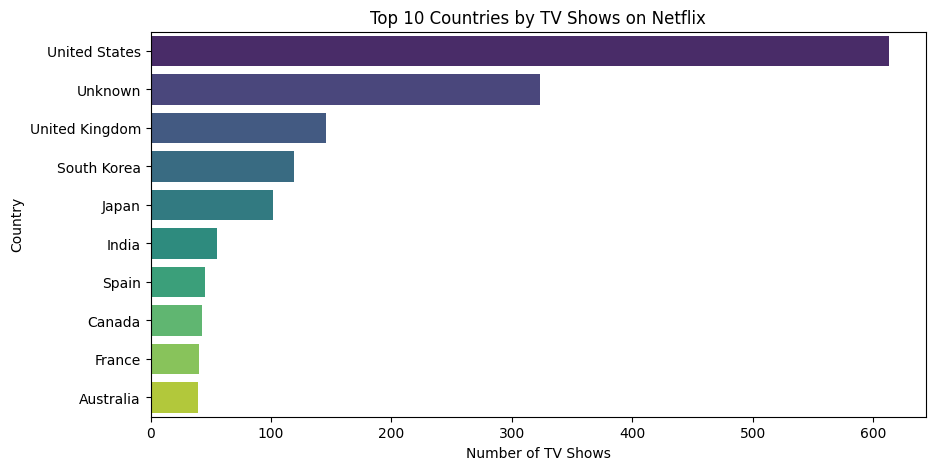

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title("Top 10 Countries by TV Shows on Netflix")
plt.xlabel("Number of TV Shows")
plt.ylabel("Country")
plt.show()


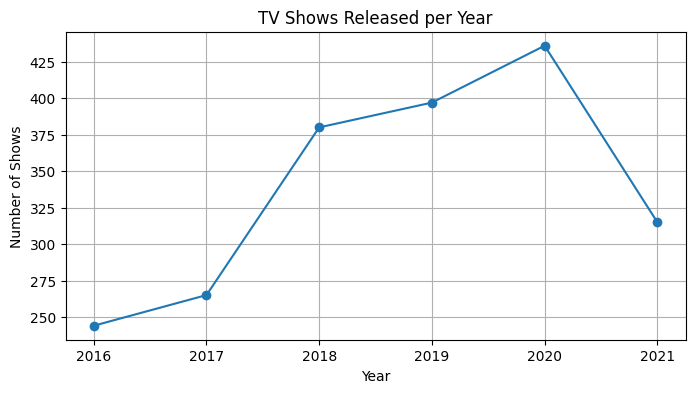

In [12]:
plt.figure(figsize=(8,4))
shows_per_year.plot(kind='line', marker='o')
plt.title("TV Shows Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Shows")
plt.grid(True)
plt.show()


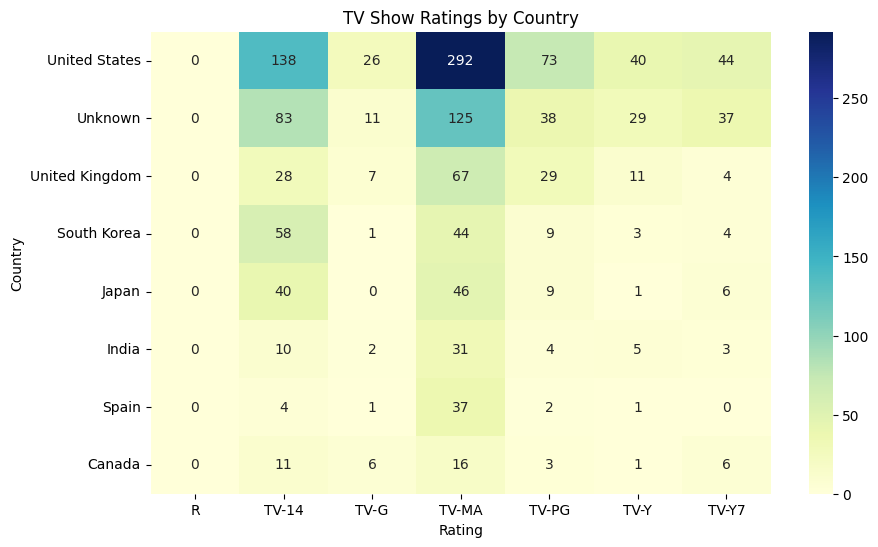

In [13]:
heatmap_data = pd.crosstab(filtered_df['country'], filtered_df['rating'])
top_countries = heatmap_data.sum(axis=1).sort_values(ascending=False).head(8).index
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data.loc[top_countries], cmap="YlGnBu", annot=True, fmt="d")
plt.title("TV Show Ratings by Country")
plt.xlabel("Rating")
plt.ylabel("Country")
plt.show()


In [1]:
from ipywidgets import interact

@interact(country=filtered_df['country'].unique())
def show_country_data(country):
    subset = filtered_df[filtered_df['country'] == country]
    genre_counts = subset['genres'].value_counts().head(5)

    plt.figure(figsize=(8,4))
    sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')
    plt.title(f"Top Genres in {country}")
    plt.xlabel("Count")
    plt.ylabel("Genre")
    plt.show()


ModuleNotFoundError: No module named 'ipywidgets'